In [ ]:
!pip3 install --upgrade tensorflow-gpu
import tensorflow as tf
tf.test.gpu_device_name()

     |████████████████████████████████| 394.3MB 38kB/s 


'/device:GPU:0'

In [ ]:
import warnings; warnings.simplefilter('ignore')
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd

In [ ]:
# Import de nos drive pour les fichiers
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
DF = pd.read_csv('/content/drive/MyDrive/Centrale Supelec/DeepLearningFinance/TD8/TP8_ES_options.csv.gz',compression='gzip',index_col=0)
DF

,mid,bid,ask,strike,option_type,expiry,days_to_expiry
index,,,,,,,
2009-03-09 15:00:00,673.000,0.05,0.25,1000,call,2009-04-17,39
2009-03-09 15:00:00,673.000,0.15,1.55,1000,call,2009-05-15,67
2009-03-09 15:00:00,673.000,0.50,2.10,1000,call,2009-06-19,102
2009-03-09 15:00:00,673.000,1.70,2.35,1000,call,2009-09-18,193
2009-03-09 15:00:00,673.000,4.00,5.50,1000,call,2009-12-18,284
...,...,...,...,...,...,...,...
2014-09-15 15:00:00,1975.125,1.20,1.65,2375,call,2015-06-19,277
2014-09-15 15:00:00,1975.125,0.85,1.30,2400,call,2015-06-19,277
2014-09-15 15:00:00,1975.125,0.40,0.85,2450,call,2015-06-19,277


In [ ]:
DF['mid_option'] = (DF.ask + DF.bid)/2 ; ## Mid Price de l'option
DF['spread'] = (DF.ask - DF.bid)/DF.mid ; ## Spread # Spread de l'option normalisé par S0
DF['Price_rescale'] = DF.mid_option/DF.mid ; ## Mid Price rescale 
DF['Strike_rescale'] = DF.strike/DF.mid ## Strike rescale
DF['Time2Mat_year'] = DF.days_to_expiry/365 ## Maturité en Années

In [ ]:
Calls = DF[DF["option_type"] == "call"]
Puts = DF[DF["option_type"] == "put"]

In [ ]:
## Calcul des volatilités sur une fenetre glissante de 7 , 14 et 49 jours.

### Calls 
log_ret_calls = np.log(pd.DataFrame(Calls['mid'].groupby('index').first())).diff()
Calls["logret"] =  log_ret_calls
Calls.dropna(inplace=True)
Calls

,mid,bid,ask,strike,option_type,expiry,days_to_expiry,mid_option,spread,Price_rescale,Strike_rescale,Time2Mat_year,logret
index,,,,,,,,,,,,,
2009-03-16 15:00:00,750.375,0.10,1.30,1000,call,2009-04-17,32,0.700,0.001599,0.000933,1.332667,0.087671,0.108828
2009-03-16 15:00:00,750.375,0.40,2.05,1000,call,2009-05-15,60,1.225,0.002199,0.001633,1.332667,0.164384,0.108828
2009-03-16 15:00:00,750.375,1.75,3.50,1000,call,2009-06-19,95,2.625,0.002332,0.003498,1.332667,0.260274,0.108828
2009-03-16 15:00:00,750.375,2.50,4.50,1000,call,2009-07-17,123,3.500,0.002665,0.004664,1.332667,0.336986,0.108828
2009-03-16 15:00:00,750.375,7.50,8.50,1000,call,2009-09-18,186,8.000,0.001333,0.010661,1.332667,0.509589,0.108828
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-15 15:00:00,1975.125,1.20,1.65,2375,call,2015-06-19,277,1.425,0.000228,0.000721,1.202456,0.758904,-0.008319
2014-09-15 15:00:00,1975.125,0.85,1.30,2400,call,2015-06-19,277,1.075,0.000228,0.000544,1.215113,0.758904,-0.008319
2014-09-15 15:00:00,1975.125,0.40,0.85,2450,call,2015-06-19,277,0.625,0.000228,0.000316,1.240428,0.758904,-0.008319


In [ ]:
## Calcul des volatilités sur une fenetre glissante de 7 , 14 et 49 jours.

### Calls 
log_ret_puts = np.log(pd.DataFrame(Puts['mid'].groupby('index').first())).diff()
Puts["logret"] =  log_ret_puts
Puts.dropna(inplace=True)
Puts

,mid,bid,ask,strike,option_type,expiry,days_to_expiry,mid_option,spread,Price_rescale,Strike_rescale,Time2Mat_year,logret
index,,,,,,,,,,,,,
2009-03-16 15:00:00,750.375,229.75,244.25,1000,put,2009-03-20,4,237.000,0.019324,0.315842,1.332667,0.010959,0.108828
2009-03-16 15:00:00,750.375,228.00,252.25,1000,put,2009-04-17,32,240.125,0.032317,0.320007,1.332667,0.087671,0.108828
2009-03-16 15:00:00,750.375,230.00,253.75,1000,put,2009-06-19,95,241.875,0.031651,0.322339,1.332667,0.260274,0.108828
2009-03-16 15:00:00,750.375,239.00,261.25,1000,put,2009-09-18,186,250.125,0.029652,0.333333,1.332667,0.509589,0.108828
2009-03-16 15:00:00,750.375,247.50,269.25,1000,put,2009-12-18,277,258.375,0.028986,0.344328,1.332667,0.758904,0.108828
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-15 15:00:00,1975.125,158.50,159.75,2075,put,2015-06-19,277,159.125,0.000633,0.080565,1.050566,0.758904,-0.008319
2014-09-15 15:00:00,1975.125,136.75,138.75,2080,put,2015-03-20,186,137.750,0.001013,0.069742,1.053098,0.509589,-0.008319
2014-09-15 15:00:00,1975.125,161.50,163.00,2080,put,2015-06-19,277,162.250,0.000759,0.082147,1.053098,0.758904,-0.008319


In [ ]:
### Rolling Vol Call

Calls['vol_roll7d'] =  log_ret_calls.rolling(7).std();
Calls['vol_roll14d'] = log_ret_calls.rolling(14).std();
Calls['vol_roll49d'] = log_ret_calls.rolling(49).std();
Calls.dropna(inplace=True)

### Rolling Vol Puts

Puts['vol_roll7d']  = log_ret_puts.rolling(7).std();
Puts['vol_roll14d'] = log_ret_puts.rolling(14).std();
Puts['vol_roll49d'] = log_ret_puts.rolling(49).std();
Puts.dropna(inplace=True)

In [ ]:
Calls

,mid,bid,ask,strike,option_type,expiry,days_to_expiry,mid_option,spread,Price_rescale,Strike_rescale,Time2Mat_year,logret,vol_roll7d,vol_roll14d,vol_roll49d
index,,,,,,,,,,,,,,,,
2010-05-31 15:00:00,1090.500,79.75,180.25,1000,call,2010-12-17,200,130.000,0.092160,0.119211,0.917011,0.547945,0.016994,0.026540,0.022138,0.037079
2010-05-31 15:00:00,1090.500,39.75,112.00,1100,call,2010-12-17,200,75.875,0.066254,0.069578,1.008712,0.547945,0.016994,0.026540,0.022138,0.037079
2010-05-31 15:00:00,1090.500,8.00,20.50,1125,call,2010-06-18,18,14.250,0.011463,0.013067,1.031637,0.049315,0.016994,0.026540,0.022138,0.037079
2010-05-31 15:00:00,1090.500,12.75,64.00,1225,call,2010-12-17,200,38.375,0.046997,0.035190,1.123338,0.547945,0.016994,0.026540,0.022138,0.037079
2010-06-07 15:00:00,1044.875,124.00,130.00,1000,call,2011-03-18,284,127.000,0.005742,0.121546,0.957052,0.778082,-0.042739,0.027830,0.024715,0.034908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-15 15:00:00,1975.125,1.20,1.65,2375,call,2015-06-19,277,1.425,0.000228,0.000721,1.202456,0.758904,-0.008319,0.012881,0.009908,0.012811
2014-09-15 15:00:00,1975.125,0.85,1.30,2400,call,2015-06-19,277,1.075,0.000228,0.000544,1.215113,0.758904,-0.008319,0.012881,0.009908,0.012811
2014-09-15 15:00:00,1975.125,0.40,0.85,2450,call,2015-06-19,277,0.625,0.000228,0.000316,1.240428,0.758904,-0.008319,0.012881,0.009908,0.012811


In [ ]:
Puts

,mid,bid,ask,strike,option_type,expiry,days_to_expiry,mid_option,spread,Price_rescale,Strike_rescale,Time2Mat_year,logret,vol_roll7d,vol_roll14d,vol_roll49d
index,,,,,,,,,,,,,,,,
2010-05-31 15:00:00,1090.500,49.00,60.00,1000,put,2010-12-17,200,54.500,0.010087,0.049977,0.917011,0.547945,0.016994,0.026540,0.022138,0.037079
2010-06-07 15:00:00,1044.875,87.50,92.00,1000,put,2011-03-18,284,89.750,0.004307,0.085895,0.957052,0.778082,-0.042739,0.027830,0.024715,0.034908
2010-06-07 15:00:00,1044.875,71.25,73.50,1000,put,2010-12-17,193,72.375,0.002153,0.069267,0.957052,0.528767,-0.042739,0.027830,0.024715,0.034908
2010-06-07 15:00:00,1044.875,91.25,95.75,1010,put,2011-03-18,284,93.500,0.004307,0.089484,0.966623,0.778082,-0.042739,0.027830,0.024715,0.034908
2010-06-07 15:00:00,1044.875,74.75,77.00,1010,put,2010-12-17,193,75.875,0.002153,0.072616,0.966623,0.528767,-0.042739,0.027830,0.024715,0.034908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-15 15:00:00,1975.125,158.50,159.75,2075,put,2015-06-19,277,159.125,0.000633,0.080565,1.050566,0.758904,-0.008319,0.012881,0.009908,0.013037
2014-09-15 15:00:00,1975.125,136.75,138.75,2080,put,2015-03-20,186,137.750,0.001013,0.069742,1.053098,0.509589,-0.008319,0.012881,0.009908,0.013037
2014-09-15 15:00:00,1975.125,161.50,163.00,2080,put,2015-06-19,277,162.250,0.000759,0.082147,1.053098,0.758904,-0.008319,0.012881,0.009908,0.013037


### Calcul des Prix theoriques de B&S 

In [ ]:
Option_Strikes = np.unique(DF.strike)
Option_Maturity = np.unique(DF.days_to_expiry)

In [ ]:
Calls[['mid_option']]

,mid_option
index,
2010-05-31 15:00:00,130.000
2010-05-31 15:00:00,75.875
2010-05-31 15:00:00,14.250
2010-05-31 15:00:00,38.375
2010-06-07 15:00:00,127.000
...,...
2014-09-15 15:00:00,1.425
2014-09-15 15:00:00,1.075
2014-09-15 15:00:00,0.625


## I Paramétres incomplets : 

Dans cette partie nous allons choisir comme predicteur : 
* Le spread normalisé par le mid price
* Le temps restant jusqu'a maturité.

Nous allons spliter notre Dataset en un partie d'entrainement et une partie de Test.Nous utilisons 80% du dataset pour l'entrainement et 20% pour le test.
Parmis les 80% des données du dataset d'entrainement , 20% d'entre elles sont utilisées pour la crossvalidation.
On utilise un early stopping qui arete l'entrainement avant que la loss de l'échantillon cross validé ne recommence croitre , et ainsi eviter l'overfitting.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Dropout  ,LeakyReLU 
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# On split le test train selon la proportion 80% train 20% test
X_train, X_test, Y_train, Y_test = train_test_split(Calls, Calls[['mid_option']], test_size=0.1, shuffle=True)#'Price_rescale''mid_option'

In [ ]:
X_train = X_train[['Strike_rescale','days_to_expiry']]
X_test  = X_test[['Strike_rescale','days_to_expiry']]

In [ ]:
X_train.shape

(48420, 2)

In [ ]:
Y_train

,mid_option
index,
2014-01-27 15:00:00,2.575
2014-05-12 15:00:00,0.550
2011-12-19 15:00:00,201.750
2010-10-18 15:00:00,115.625
2010-11-22 15:00:00,0.625
...,...
2012-10-22 15:00:00,83.125
2013-12-30 15:00:00,10.625
2012-06-18 15:00:00,70.625


In [ ]:
def Dense_ANN(activ_func = 'relu',X_train_shape = X_train.shape[1]):

  activ_fn = activ_func
  model = Sequential()
  model.add(Dense(200 , activation = activ_fn ,input_dim = X_train_shape))
  model.add(Dense(150,activation= activ_fn))
  model.add(Dense(100,activation= activ_fn))
  model.add(Dense(80,activation= activ_fn))
  model.add(Dense(50,activation= activ_fn))
  model.add(Dense(30,activation= activ_fn))
  model.add(Dense(20,activation= activ_fn))
  model.add(Dense(10,activation= activ_fn))
  model.add(Dense(5,activation= activ_fn))
  model.add(Dense(1,activation= activ_fn))
  Opt_Adam = Adam(learning_rate = 1e-3) ## On reduit le learning rate par default car difficulté a converger au debut
  model.compile(loss = 'mse' , optimizer = Opt_Adam , metrics=["mse"])
  return model

In [ ]:
ANN = Dense_ANN(activ_func = 'relu',X_train_shape = X_train.shape[1])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,mode='auto', baseline=None,
                                            restore_best_weights=True)
ANN.fit(X_train,Y_train,validation_split=0.2,epochs=1000, callbacks=[callback])

Epoch 1/1000
1211/1211 [==============================] - 6s 3ms/step - loss: 10337.7267 - mse: 10337.7267 - val_loss: 8389.4268 - val_mse: 8389.4268
Epoch 2/1000
1211/1211 [==============================] - 3s 3ms/step - loss: 8516.2057 - mse: 8516.2057 - val_loss: 8163.7358 - val_mse: 8163.7358
Epoch 3/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 7696.2104 - mse: 7696.2104 - val_loss: 4409.1006 - val_mse: 4409.1006
Epoch 4/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 7897.2213 - mse: 7897.2213 - val_loss: 8094.9268 - val_mse: 8094.9268
Epoch 5/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 5356.5863 - mse: 5356.5863 - val_loss: 470.3089 - val_mse: 470.3089
Epoch 6/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 771.5018 - mse: 771.5018 - val_loss: 322.7230 - val_mse: 322.7230
Epoch 7/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 725.7415 - mse: 725.7415 - val_loss: 1

In [ ]:
resultats = Y_test ; resultats["mid_predict"] = ANN.predict(X_test).flatten().tolist() ;
resultats["err"] = round((np.abs(resultats.mid_predict - resultats.mid_option)/resultats.mid_option)*100,2) ; resultats

,mid_option,mid_predict,err
index,,,
2010-10-11 15:00:00,0.175,1.678932,859.39
2014-01-13 15:00:00,2.250,4.575906,103.37
2010-06-14 15:00:00,19.500,8.698817,55.39
2014-03-17 15:00:00,1.000,2.455234,145.52
2012-03-26 15:00:00,255.750,254.551865,0.47
...,...,...,...
2013-06-03 15:00:00,101.375,87.402946,13.78
2012-11-19 15:00:00,3.850,5.195535,34.95
2012-03-26 15:00:00,60.750,69.351097,14.16


> On calcul l'érreur relative de prédiction pour chaque prix.Il apparait plus adequate de mesurer l'erreur relative plutot que l'erreur absolue.

Text(0.5, 1.0, 'Erreur relative between Price Predicted and Prices')

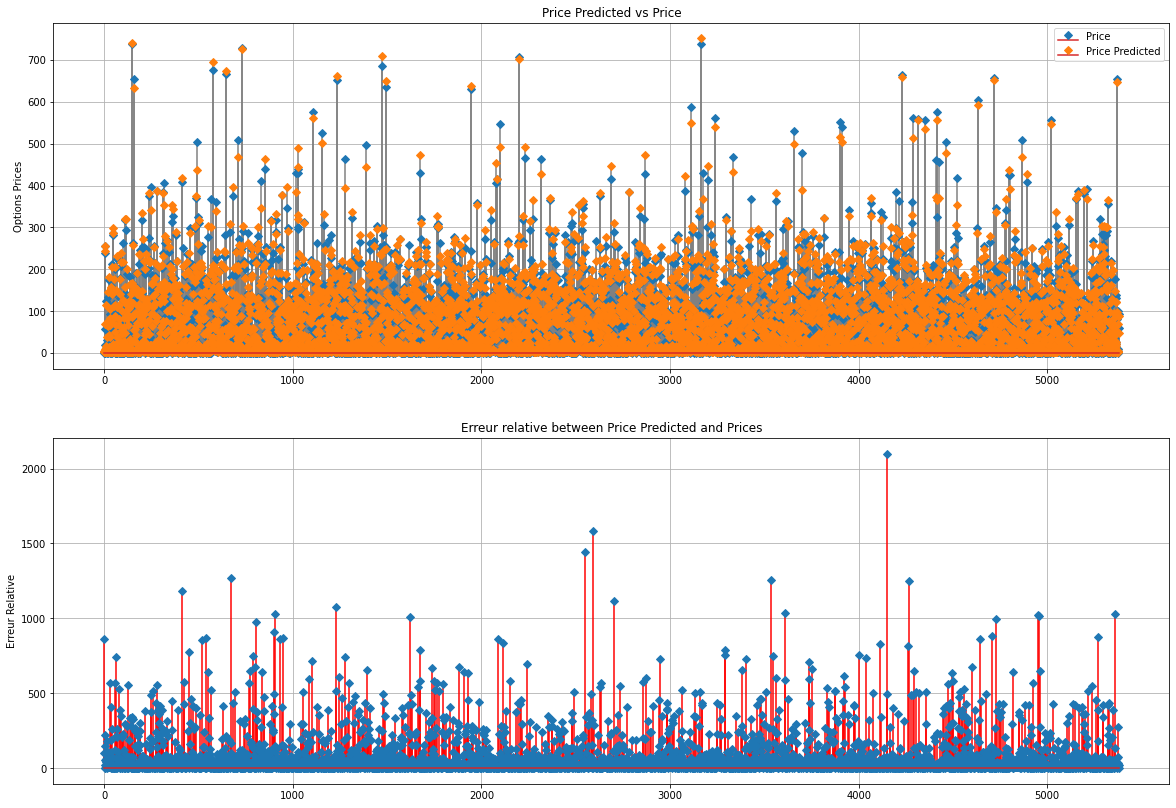

In [ ]:
fig , ax = plt.subplots(2,1,figsize = (20,14))
ax[0].stem(np.arange(0,resultats.shape[0],1), resultats.mid_option.values, linefmt='grey', markerfmt='D', bottom=0.7, use_line_collection=True,label = "Price")
ax[0].stem(np.arange(0,resultats.shape[0],1), resultats.mid_predict.values, linefmt='grey', markerfmt='D', bottom=0.7, use_line_collection=True,label = "Price Predicted")
ax[0].set_ylabel("Options Prices")
ax[0].legend()
ax[0].set_title("Price Predicted vs Price")
ax[0].grid()
ax[1].stem(np.arange(0,resultats.shape[0],1), resultats.err.values, linefmt='red', markerfmt='D', bottom=0.7, use_line_collection=True)
ax[1].grid()
ax[1].set_ylabel("Erreur Relative")
ax[1].set_title("Erreur relative between Price Predicted and Prices")

Les metrics traditionnelles que nous utilisons sont le Mean Squared Error et la Mean Absolute Error.

In [ ]:
MSE_ANN1 = mean_squared_error(resultats.mid_option,resultats.mid_predict)
MAE_ANN1 = mean_absolute_error(resultats.mid_option,resultats.mid_predict)
print(f"La mean squared error est de : {MSE_ANN1}")
print(f"La mean absolute error est de : {MAE_ANN1}")

La mean squared error est de : 141.12080656168
La mean absolute error est de : 7.481781601276539


## II Paramétres incomplets + Spread Relatif : 

In [ ]:
# On split le test train selon la proportion 80% train 20% test
X_train, X_test, Y_train, Y_test = train_test_split(Calls, Calls[['mid_option']], test_size=0.1, shuffle=True)
X_train = X_train[['Strike_rescale','days_to_expiry','spread']]
X_test  = X_test[['Strike_rescale','days_to_expiry','spread']]

In [ ]:
ANN2 = Dense_ANN(activ_func = 'relu',X_train_shape = X_train.shape[1])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,mode='auto', baseline=None,
                                            restore_best_weights=True)
history2 = tf.keras.callbacks.History()
ANN2.fit(X_train,Y_train,validation_split=0.2,epochs=1000, callbacks=[callback,history2])

Epoch 1/1000
1211/1211 [==============================] - 5s 3ms/step - loss: 10415.2154 - mse: 10415.2154 - val_loss: 8392.8975 - val_mse: 8392.8975
Epoch 2/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 8461.9258 - mse: 8461.9258 - val_loss: 5142.7944 - val_mse: 5142.7944
Epoch 3/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 5353.2601 - mse: 5353.2601 - val_loss: 5717.7437 - val_mse: 5717.7437
Epoch 4/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 1163.3908 - mse: 1163.3908 - val_loss: 515.3562 - val_mse: 515.3562
Epoch 5/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 806.8317 - mse: 806.8317 - val_loss: 1060.1337 - val_mse: 1060.1337
Epoch 6/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 644.1560 - mse: 644.1560 - val_loss: 418.1817 - val_mse: 418.1817
Epoch 7/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 461.5097 - mse: 461.5097 - val_loss: 306

In [ ]:
resultats = Y_test ; resultats["mid_predict"] = ANN2.predict(X_test).flatten().tolist() ;
resultats["err"] = round((np.abs(resultats.mid_predict - resultats.mid_option)/resultats.mid_option)*100,2) ; resultats

,mid_option,mid_predict,err
index,,,
2011-04-18 15:00:00,23.375,22.536209,3.59
2011-10-10 15:00:00,146.000,149.986176,2.73
2012-08-20 15:00:00,345.500,344.524811,0.28
2011-09-12 15:00:00,40.875,11.133598,72.76
2012-11-19 15:00:00,111.625,129.457336,15.98
...,...,...,...
2013-02-25 15:00:00,8.750,13.258832,51.53
2013-03-04 15:00:00,114.375,107.435387,6.07
2011-04-04 15:00:00,1.525,2.194006,43.87


Text(0.5, 1.0, 'Erreur relative between Price Predicted and Prices')

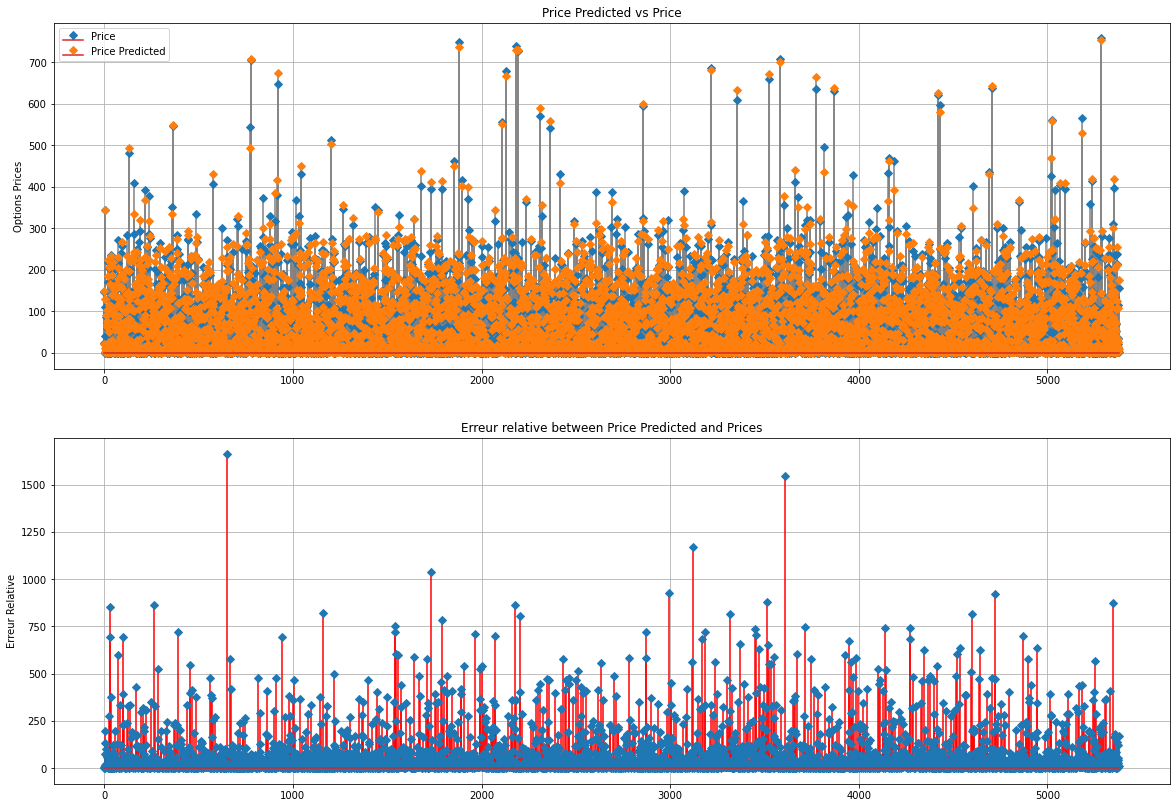

In [ ]:
fig , ax = plt.subplots(2,1,figsize = (20,14))
ax[0].stem(np.arange(0,resultats.shape[0],1), resultats.mid_option.values, linefmt='grey', markerfmt='D', bottom=0.7, use_line_collection=True,label = "Price")
ax[0].stem(np.arange(0,resultats.shape[0],1), resultats.mid_predict.values, linefmt='grey', markerfmt='D', bottom=0.7, use_line_collection=True,label = "Price Predicted")
ax[0].set_ylabel("Options Prices")
ax[0].legend()
ax[0].set_title("Price Predicted vs Price")
ax[0].grid()
ax[1].stem(np.arange(0,resultats.shape[0],1), resultats.err.values, linefmt='red', markerfmt='D', bottom=0.7, use_line_collection=True)
ax[1].grid()
ax[1].set_ylabel("Erreur Relative")
ax[1].set_title("Erreur relative between Price Predicted and Prices")

Les metrics traditionnelles que nous utilisons sont le Mean Squared Error et la Mean Absolute Error.

In [ ]:
MSE_ANN2 = mean_squared_error(resultats.mid_option,resultats.mid_predict)
MAE_ANN2 = mean_absolute_error(resultats.mid_option,resultats.mid_predict)
print(f"La mean squared error est de : {MSE_ANN2}")
print(f"La mean absolute error est de : {MAE_ANN2}")

La mean squared error est de : 141.23184184333283
La mean absolute error est de : 7.534735266408956


## III Paramétres incomplets + Spread Relatif + mesure de volatilité : 

In [ ]:
# On split le test train selon la proportion 80% train 20% test
X_train, X_test, Y_train, Y_test = train_test_split(Calls, Calls[['mid_option']], test_size=0.1, shuffle=True)
X_train = X_train[['Strike_rescale','days_to_expiry','spread','vol_roll49d']]
X_test  = X_test[['Strike_rescale','days_to_expiry','spread','vol_roll49d']]

In [ ]:
ANN3 = Dense_ANN(activ_func = 'relu',X_train_shape = X_train.shape[1])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,mode='auto', baseline=None,
                                            restore_best_weights=True)
history3 = tf.keras.callbacks.History()
ANN3.fit(X_train,Y_train,validation_split=0.2,epochs=1000, callbacks=[callback,history3])

Epoch 1/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 9934.6216 - mse: 9934.6216 - val_loss: 8811.5449 - val_mse: 8811.5449
Epoch 2/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 8251.5634 - mse: 8251.5634 - val_loss: 8670.2383 - val_mse: 8670.2383
Epoch 3/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 7710.0278 - mse: 7710.0278 - val_loss: 4821.7227 - val_mse: 4821.7227
Epoch 4/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 5393.6143 - mse: 5393.6143 - val_loss: 724.1656 - val_mse: 724.1656
Epoch 5/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 2037.4735 - mse: 2037.4735 - val_loss: 463.8752 - val_mse: 463.8752
Epoch 6/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 1044.3460 - mse: 1044.3460 - val_loss: 349.4510 - val_mse: 349.4510
Epoch 7/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 733.9562 - mse: 733.9562 - val_loss: 603

In [ ]:
resultats = Y_test ; resultats["mid_predict"] = ANN3.predict(X_test).flatten().tolist() ;
resultats["err"] = round((np.abs(resultats.mid_predict - resultats.mid_option)/resultats.mid_option)*100,2) ; resultats

,mid_option,mid_predict,err
index,,,
2013-05-06 15:00:00,89.500,97.683662,9.14
2013-07-15 15:00:00,140.625,133.381760,5.15
2011-04-25 15:00:00,215.250,226.419724,5.19
2012-09-24 15:00:00,0.850,2.134963,151.17
2010-08-16 15:00:00,97.625,97.389854,0.24
...,...,...,...
2012-01-30 15:00:00,174.500,182.820786,4.77
2011-12-05 15:00:00,134.125,140.006149,4.38
2013-10-14 15:00:00,4.275,7.470470,74.75


Text(0.5, 1.0, 'Erreur relative between Price Predicted and Prices')

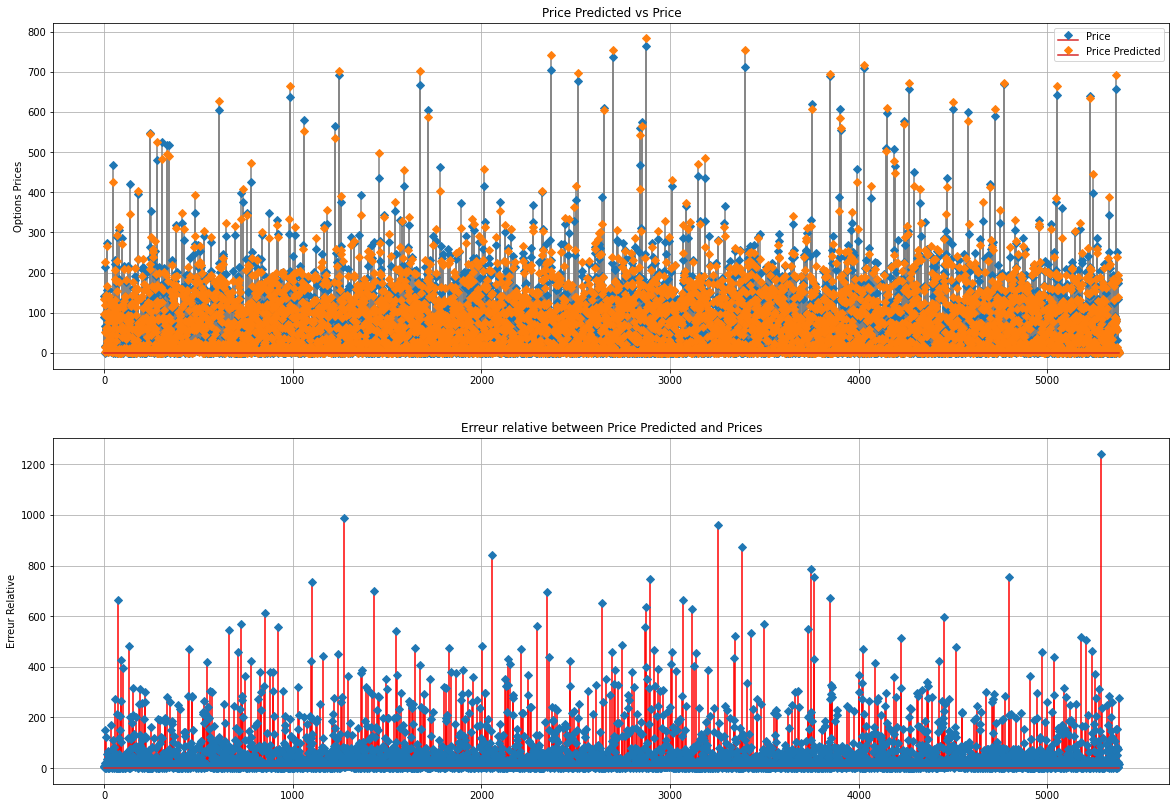

In [ ]:
fig , ax = plt.subplots(2,1,figsize = (20,14))
ax[0].stem(np.arange(0,resultats.shape[0],1), resultats.mid_option.values, linefmt='grey', markerfmt='D', bottom=0.7, use_line_collection=True,label = "Price")
ax[0].stem(np.arange(0,resultats.shape[0],1), resultats.mid_predict.values, linefmt='grey', markerfmt='D', bottom=0.7, use_line_collection=True,label = "Price Predicted")
ax[0].set_ylabel("Options Prices")
ax[0].legend()
ax[0].set_title("Price Predicted vs Price")
ax[0].grid()
ax[1].stem(np.arange(0,resultats.shape[0],1), resultats.err.values, linefmt='red', markerfmt='D', bottom=0.7, use_line_collection=True)
ax[1].grid()
ax[1].set_ylabel("Erreur Relative")
ax[1].set_title("Erreur relative between Price Predicted and Prices")

Les metrics traditionnelles que nous utilisons sont le Mean Squared Error et la Mean Absolute Error.

In [ ]:
MSE_ANN3 = mean_squared_error(resultats.mid_option,resultats.mid_predict)
MAE_ANN3 = mean_absolute_error(resultats.mid_option,resultats.mid_predict)
print(f"La mean squared error est de : {MSE_ANN3}")
print(f"La mean absolute error est de : {MAE_ANN3}")

La mean squared error est de : 134.8945332246984
La mean absolute error est de : 7.488279572060561


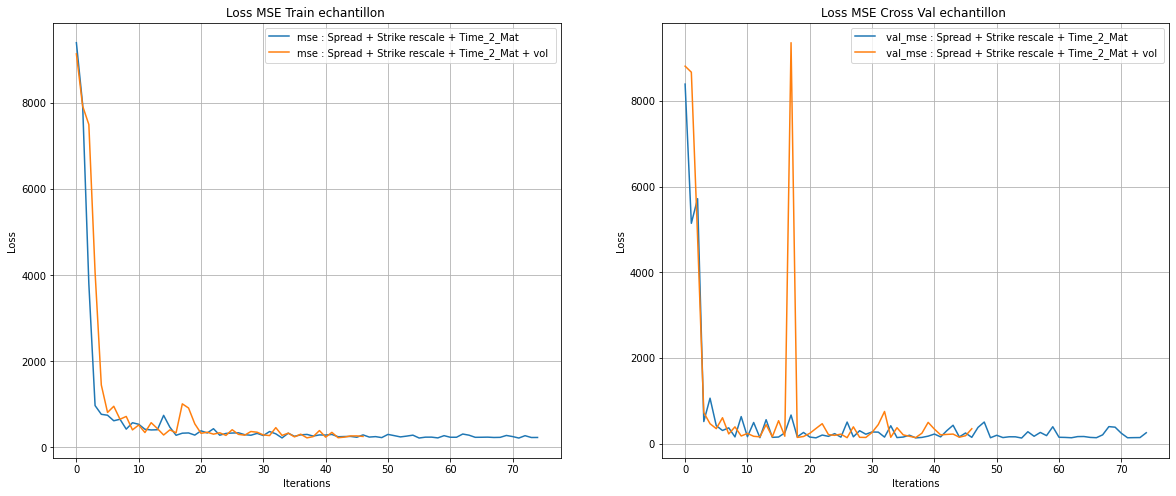

In [ ]:
fig , ax = plt.subplots(1,2,figsize = (20,8))
ax[0].plot(history2.history["mse"],label = "mse : Spread + Strike rescale + Time_2_Mat")
ax[0].plot(history3.history["mse"],label = "mse : Spread + Strike rescale + Time_2_Mat + vol ")
ax[0].grid() ; ax[0].set_xlabel("Iterations") ; ax[0].set_ylabel("Loss") ; ax[0].set_title("Loss MSE Train echantillon ")
ax[0].legend()
ax[1].plot(history2.history['val_mse'],label = " val_mse : Spread + Strike rescale + Time_2_Mat")
ax[1].plot(history3.history['val_mse'],label = " val_mse : Spread + Strike rescale + Time_2_Mat + vol ")
ax[1].grid() ; ax[1].set_xlabel("Iterations") ; ax[1].set_ylabel("Loss") ; ax[1].set_title("Loss MSE Cross Val echantillon ")
ax[1].legend()

> Lorsque nous introduisons la volatilité ,on observe que l'apprentissenge est plus rapide mais présente aussi de plus grande variation de la loss et val loss. On observe aussi que la valeur des fonction de perte d'entrainement et de cross validation sont trés proches.

> Les mse et mae avec la vol et  sans la vol ne presentent pas d'améliorations significatives.

## IV Paramétres incomplets + Spread Relatif + mesure de volatilité + Black et Scholes : 

In [ ]:
from tqdm.notebook import tqdm
from scipy.stats import norm
Calls['r'] = 0

def CallBS(S0,K,T2mat,r,sig):
    d1 = (np.log(S0/K) + (r + 0.5*sig**2)* T2mat)/(sig * np.sqrt(T2mat))
    d2 = d1 - sig*np.sqrt(T2mat)
    C = (S0*norm.cdf(d1) -K*np.exp(-r*T2mat)*norm.cdf(d2))
    return C

def PutBS(S0,K,T2mat,r,sigma):
    d1 = (np.log(S0/K) + (r + 0.5*sig**2)* T2mat)/(sig * np.sqrt(T2mat))
    d2 = d1 - sig*np.sqrt(T2mat)
    P = (K*np.exp(-r*T2mat)*norm.cdf(-d2)- S0*norm.cdf(-d1))
    return P

def Add_BSPrices(Tab):
  Prices = list()
  for i in tqdm(range(Tab.shape[0])):
    Prices.append(CallBS(Tab.mid.values[i],Tab.strike[i],Tab.Time2Mat_year[i],Tab.r[i],Tab.vol_roll49d[i]*np.sqrt(52)))
  return Prices

Calls['BS'] = Add_BSPrices(Calls)
Calls

,mid,bid,ask,strike,option_type,expiry,days_to_expiry,mid_option,spread,Price_rescale,Strike_rescale,Time2Mat_year,logret,vol_roll7d,vol_roll14d,vol_roll49d,r,BS
index,,,,,,,,,,,,,,,,,,
2010-05-31 15:00:00,1090.500,79.75,180.25,1000,call,2010-12-17,200,130.000,0.092160,0.119211,0.917011,0.547945,0.016994,0.026540,0.022138,0.037079,0,135.387104
2010-05-31 15:00:00,1090.500,39.75,112.00,1100,call,2010-12-17,200,75.875,0.066254,0.069578,1.008712,0.547945,0.016994,0.026540,0.022138,0.037079,0,81.672347
2010-05-31 15:00:00,1090.500,8.00,20.50,1125,call,2010-06-18,18,14.250,0.011463,0.013067,1.031637,0.049315,0.016994,0.026540,0.022138,0.037079,0,12.514163
2010-05-31 15:00:00,1090.500,12.75,64.00,1225,call,2010-12-17,200,38.375,0.046997,0.035190,1.123338,0.547945,0.016994,0.026540,0.022138,0.037079,0,39.264450
2010-06-07 15:00:00,1044.875,124.00,130.00,1000,call,2011-03-18,284,127.000,0.005742,0.121546,0.957052,0.778082,-0.042739,0.027830,0.024715,0.034908,0,114.575913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-15 15:00:00,1975.125,1.20,1.65,2375,call,2015-06-19,277,1.425,0.000228,0.000721,1.202456,0.758904,-0.008319,0.012881,0.009908,0.012811,0,0.655205
2014-09-15 15:00:00,1975.125,0.85,1.30,2400,call,2015-06-19,277,1.075,0.000228,0.000544,1.215113,0.758904,-0.008319,0.012881,0.009908,0.012811,0,0.447185
2014-09-15 15:00:00,1975.125,0.40,0.85,2450,call,2015-06-19,277,0.625,0.000228,0.000316,1.240428,0.758904,-0.008319,0.012881,0.009908,0.012811,0,0.202079


In [ ]:
# On split le test train selon la proportion 80% train 20% test
X_train, X_test, Y_train, Y_test = train_test_split(Calls, Calls[['mid_option']], test_size=0.1, shuffle=True)
X_train = X_train[['Strike_rescale','days_to_expiry','spread','vol_roll49d','BS']]
X_test  = X_test[['Strike_rescale','days_to_expiry','spread','vol_roll49d','BS']]

In [ ]:
ANN4 = Dense_ANN(activ_func = 'relu',X_train_shape = X_train.shape[1])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,mode='auto', baseline=None,
                                            restore_best_weights=True)
history4 = tf.keras.callbacks.History()
ANN4.fit(X_train,Y_train,validation_split=0.2,epochs=1000, callbacks=[callback,history4])

Epoch 1/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 1311.3739 - mse: 1311.3739 - val_loss: 264.7664 - val_mse: 264.7664
Epoch 2/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 210.5329 - mse: 210.5329 - val_loss: 241.8050 - val_mse: 241.8050
Epoch 3/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 197.6210 - mse: 197.6210 - val_loss: 208.6569 - val_mse: 208.6569
Epoch 4/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 204.1664 - mse: 204.1664 - val_loss: 248.1381 - val_mse: 248.1381
Epoch 5/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 207.8396 - mse: 207.8396 - val_loss: 213.7065 - val_mse: 213.7065
Epoch 6/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 205.0006 - mse: 205.0006 - val_loss: 225.6817 - val_mse: 225.6817
Epoch 7/1000
1211/1211 [==============================] - 4s 3ms/step - loss: 197.4368 - mse: 197.4368 - val_loss: 204.0699 - val_mse:

In [ ]:
resultats = Y_test ; resultats["mid_predict"] = ANN4.predict(X_test).flatten().tolist() ;
resultats["err"] = round((np.abs(resultats.mid_predict - resultats.mid_option)/resultats.mid_option)*100,2) ; resultats

,mid_option,mid_predict,err
index,,,
2013-11-18 15:00:00,73.500,72.681625,1.11
2010-08-16 15:00:00,6.500,2.810676,56.76
2013-04-22 15:00:00,143.750,147.093155,2.33
2011-07-11 15:00:00,264.875,266.540222,0.63
2013-05-06 15:00:00,5.250,6.369670,21.33
...,...,...,...
2012-07-23 15:00:00,50.875,54.707703,7.53
2013-02-11 15:00:00,79.125,87.017265,9.97
2011-04-25 15:00:00,5.625,9.671185,71.93


Text(0.5, 1.0, 'Erreur relative between Price Predicted and Prices')

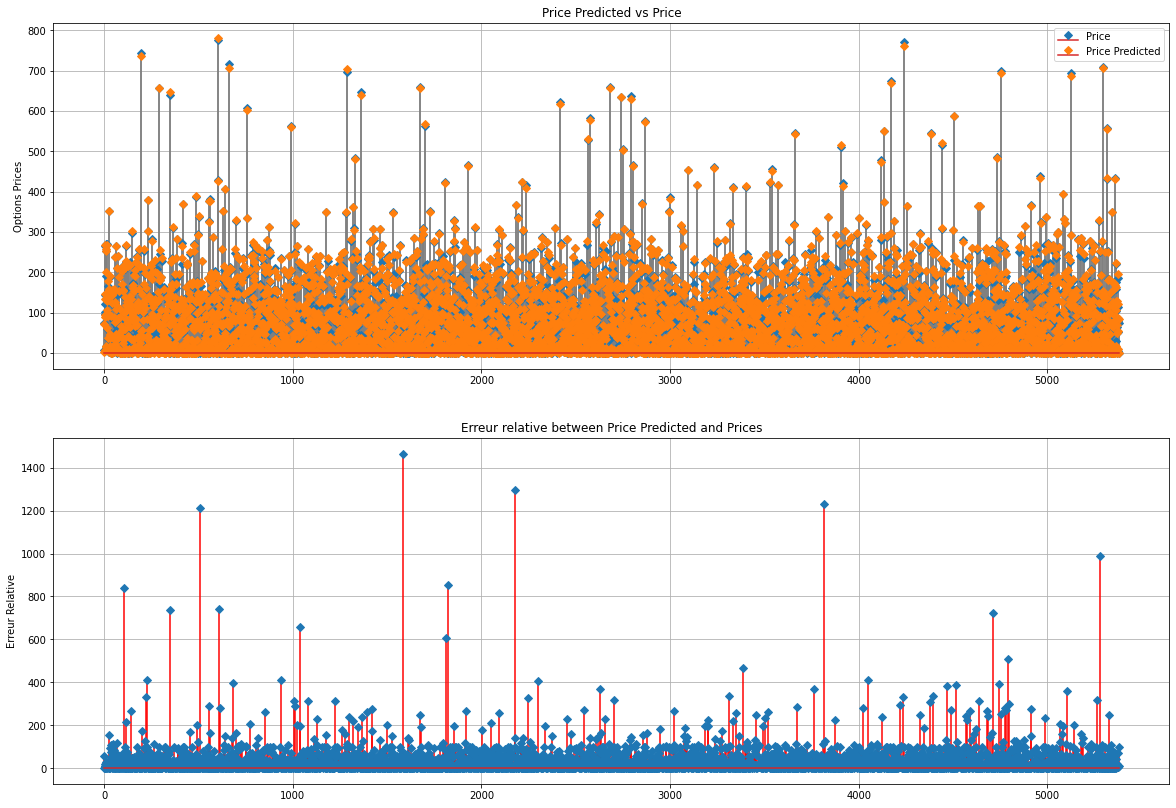

In [ ]:
fig , ax = plt.subplots(2,1,figsize = (20,14))
ax[0].stem(np.arange(0,resultats.shape[0],1), resultats.mid_option.values, linefmt='grey', markerfmt='D', bottom=0.7, use_line_collection=True,label = "Price")
ax[0].stem(np.arange(0,resultats.shape[0],1), resultats.mid_predict.values, linefmt='grey', markerfmt='D', bottom=0.7, use_line_collection=True,label = "Price Predicted")
ax[0].set_ylabel("Options Prices")
ax[0].legend()
ax[0].set_title("Price Predicted vs Price")
ax[0].grid()
ax[1].stem(np.arange(0,resultats.shape[0],1), resultats.err.values, linefmt='red', markerfmt='D', bottom=0.7, use_line_collection=True)
ax[1].grid()
ax[1].set_ylabel("Erreur Relative")
ax[1].set_title("Erreur relative between Price Predicted and Prices")

In [ ]:
MSE_ANN4 = mean_squared_error(resultats.mid_option,resultats.mid_predict)
MAE_ANN4 = mean_absolute_error(resultats.mid_option,resultats.mid_predict)
print(f"La mean squared error est de : {MSE_ANN4}")
print(f"La mean absolute error est de : {MAE_ANN4}")

La mean squared error est de : 37.54009361324404
La mean absolute error est de : 4.097444340553426


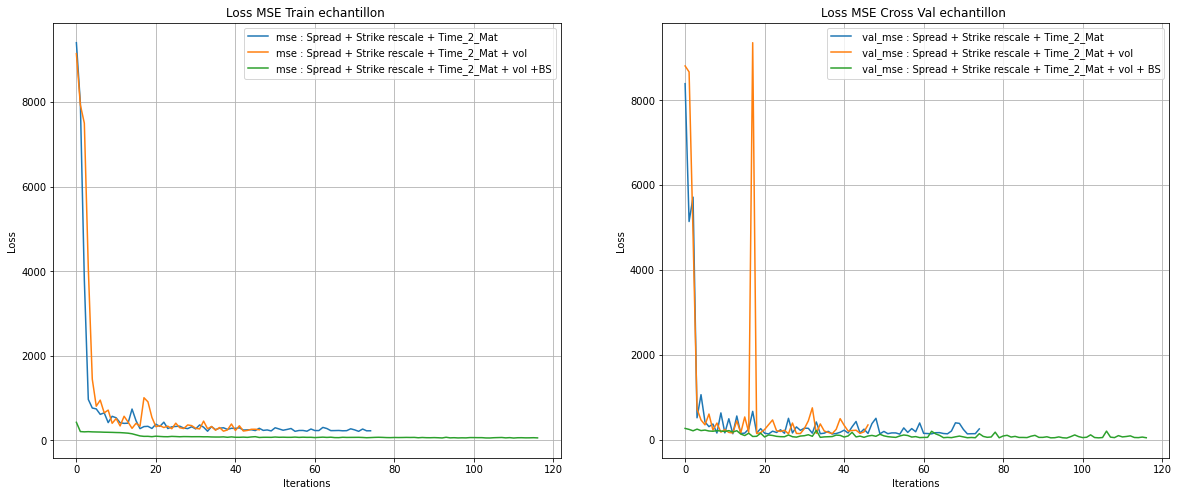

In [ ]:
fig , ax = plt.subplots(1,2,figsize = (20,8))
ax[0].plot(history2.history["mse"],label = "mse : Spread + Strike rescale + Time_2_Mat")
ax[0].plot(history3.history["mse"],label = "mse : Spread + Strike rescale + Time_2_Mat + vol ")
ax[0].plot(history4.history["mse"],label = "mse : Spread + Strike rescale + Time_2_Mat + vol +BS")
ax[0].grid() ; ax[0].set_xlabel("Iterations") ; ax[0].set_ylabel("Loss") ; ax[0].set_title("Loss MSE Train echantillon ")
ax[0].legend()
ax[1].plot(history2.history['val_mse'],label = " val_mse : Spread + Strike rescale + Time_2_Mat")
ax[1].plot(history3.history['val_mse'],label = " val_mse : Spread + Strike rescale + Time_2_Mat + vol ")
ax[1].plot(history4.history['val_mse'],label = " val_mse : Spread + Strike rescale + Time_2_Mat + vol + BS")
ax[1].grid() ; ax[1].set_xlabel("Iterations") ; ax[1].set_ylabel("Loss") ; ax[1].set_title("Loss MSE Cross Val echantillon ")
ax[1].legend()

> on observe que l'apprentissage est plus rapide avec le prix B&S comme feature.Il apparait aussi que les fonction de pertes sont aussi mieux minimisée , ce nouveau feature contient donc de l'information pertinente.

In [ ]:
Bilan_MSE = pd.DataFrame(columns=['mse I','mse II','mse III','mse IV']);
Bilan_MSE = Bilan_MSE.append({'mse I' : MSE_ANN1,'mse II': MSE_ANN2,'mse III' : MSE_ANN3,'mse IV': MSE_ANN4},ignore_index=True)
Bilan_MSE

,mse I,mse II,mse III,mse IV
0,141.120807,141.231842,134.894533,37.540094


In [ ]:
Bilan_MAE = pd.DataFrame(columns=['mae I','mae II','mae III','mae IV']);
Bilan_MAE = Bilan_MAE.append({'mae I' : MAE_ANN1,'mae II': MAE_ANN2 ,'mae III' : MAE_ANN3,'mae IV': MAE_ANN4},ignore_index=True)
Bilan_MAE

,mae I,mae II,mae III,mae IV
0,7.481782,7.534735,7.48828,4.097444


> On observe que l'introduction du prix B&S améliore significativement le pouvoir prédictif.